# Loading the Data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,  RobustScaler 
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Credit_Score/train.csv", low_memory=False)
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Credit_History_Age

In [ ]:
def format_credit_history_age(age_str):
    if type(age_str) != str or pd.isna(age_str):
        return np.nan
    years, months = age_str.split(' Years and ')
    months = months.replace(' Months', '')
    total_months = int(years) * 12 + int(months)
    return total_months
data['Credit_History_Age'] = data['Credit_History_Age'].apply(format_credit_history_age)

In [ ]:
for i in range(1, len(data['Credit_History_Age'])-1):
    if data['Customer_ID'][i] != data['Customer_ID'][i+1]:
        data['Credit_History_Age'][i] = data['Credit_History_Age'][i-1]+1
    elif data['Customer_ID'][i] != data['Customer_ID'][i-1]:
        data['Credit_History_Age'][i] = data['Credit_History_Age'][i+1]-1
    else:
        data['Credit_History_Age'] = data['Credit_History_Age'].interpolate()

<ipython-input-428-150b5402e38d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit_History_Age'][i] = data['Credit_History_Age'][i-1]+1
<ipython-input-428-150b5402e38d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit_History_Age'][i] = data['Credit_History_Age'][i+1]-1


# AGE

In [ ]:
data['Age'] = data['Age'].astype(str).str.replace('_', '')
data['Age'] = data['Age'].astype(str).str.replace('-500', '500')
data['Age'] = data.Age.astype(int)

In [ ]:
age_mode = data.groupby('Customer_ID')['Age'].apply(lambda x: stats.mode(x)[0][0])
data['Age'] = data.apply(lambda row: age_mode[row['Customer_ID']] if row['Age'] == row['Age'] else row['Age'], axis=1)
print(data['Age'].value_counts())

<ipython-input-430-92558c6bda9f>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  age_mode = data.groupby('Customer_ID')['Age'].apply(lambda x: stats.mode(x)[0][0])


31    3112
28    3096
26    3032
38    3032
25    3016
36    2952
27    2952
35    2944
39    2936
34    2896
44    2888
37    2888
32    2888
22    2880
19    2840
41    2840
20    2816
29    2808
21    2776
23    2776
43    2768
30    2768
40    2712
24    2696
42    2688
45    2648
33    2632
18    2568
46    1704
15    1616
17    1568
16    1456
48    1432
53    1424
55    1424
49    1376
51    1368
52    1360
54    1320
50    1312
14    1256
47    1224
56     312
Name: Age, dtype: int64


# Occupation

In [ ]:
data['Occupation'] = data.groupby('Customer_ID', group_keys=False)['Occupation'].apply(lambda x: x.replace("_______", x.mode()[0]))
data.drop(data.loc[data['Occupation'] == "_______"].index, inplace=True)
print(data['Occupation'].value_counts())

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64


# Annual_Income

In [ ]:
data['Annual_Income'] = data['Annual_Income'].astype(str).str.replace('_', '')
data['Annual_Income'] = data['Annual_Income'].astype(float)
data['Annual_Income'] = data.groupby('Customer_ID')['Annual_Income'].transform(lambda x: x.mode()[0] if len(x) > 1 else x)
print(data['Annual_Income'].value_counts())

95596.35    16
9141.63     16
40341.16    16
32543.38    16
72524.20    16
            ..
18317.26     8
14784.45     8
60573.96     8
39628.99     8
44393.86     3
Name: Annual_Income, Length: 12488, dtype: int64


# Monthly_Inhand_Salary

In [ ]:
data['Monthly_Inhand_Salary'] = data.groupby('Customer_ID', group_keys=False)['Monthly_Inhand_Salary'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill'))
print(Counter(data['Monthly_Inhand_Salary']))

Counter({4387.2725: 16, 3080.5550000000007: 16, 6082.1875: 16, 536.43125: 16, 5766.491666666666: 16, 6769.13: 16, 6358.956666666666: 16, 6639.56: 16, 1315.5608333333332: 16, 2295.058333333333: 16, 2557.8616666666667: 12, 1824.8433333333328: 8, 3037.986666666666: 8, 12187.22: 8, 2612.4908333333333: 8, 2853.3091666666664: 8, 5988.705000000001: 8, 2611.115: 8, 9843.8675: 8, 2825.233333333333: 8, 2948.605833333333: 8, 7266.686666666667: 8, 4766.68: 8, 519.12875: 8, 2415.855: 8, 2942.148333333333: 8, 7591.59: 8, 2898.385: 8, 1512.361666666667: 8, 1828.24: 8, 1074.5845833333333: 8, 8873.4275: 8, 782.0370833333334: 8, 4720.926666666667: 8, 1999.3075: 8, 2697.51: 8, 3622.186666666666: 8, 2210.0325: 8, 3007.461666666666: 8, 1684.168333333333: 8, 1387.303333333333: 8, 959.22875: 8, 4664.75: 8, 3764.331666666667: 8, 5799.45: 8, 2227.8316666666665: 8, 6284.613333333334: 8, 1423.168333333333: 8, 5800.276666666668: 8, 853.8245833333333: 8, 2623.703333333333: 8, 1740.539166666667: 8, 12432.61: 8, 718

# Num_Bank_Accounts

In [ ]:
data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].astype(str).str.replace('-1', '0')
data['Num_Bank_Accounts'] = data.Num_Bank_Accounts.astype(int)
print(Counter(data['Num_Bank_Accounts']))

Counter({6: 12996, 7: 12823, 8: 12765, 4: 12186, 5: 12118, 3: 11950, 9: 5443, 10: 5247, 1: 4490, 0: 4349, 2: 4304, 11: 9, 803: 7, 1668: 5, 791: 5, 105: 5, 857: 4, 1096: 4, 1139: 4, 210: 4, 1257: 4, 1033: 4, 1481: 4, 43: 4, 312: 4, 34: 4, 1696: 3, 889: 3, 37: 3, 1332: 3, 1748: 3, 1611: 3, 812: 3, 610: 3, 1577: 3, 933: 3, 809: 3, 1089: 3, 527: 3, 687: 3, 1747: 3, 137: 3, 170: 3, 1478: 3, 596: 3, 1114: 3, 632: 3, 179: 3, 28: 3, 1124: 3, 882: 3, 505: 3, 1065: 3, 584: 3, 903: 3, 786: 3, 229: 3, 1051: 3, 832: 3, 483: 3, 1501: 3, 540: 3, 1756: 3, 1247: 3, 490: 3, 385: 3, 1771: 3, 239: 3, 805: 3, 1574: 3, 1733: 3, 330: 3, 1461: 3, 560: 3, 313: 3, 1352: 3, 350: 3, 265: 3, 1617: 3, 1137: 3, 196: 3, 39: 3, 511: 3, 1320: 3, 927: 3, 850: 3, 1414: 2, 1231: 2, 67: 2, 572: 2, 1647: 2, 649: 2, 1620: 2, 120: 2, 494: 2, 744: 2, 121: 2, 823: 2, 1662: 2, 429: 2, 1434: 2, 1026: 2, 526: 2, 1300: 2, 501: 2, 480: 2, 1042: 2, 322: 2, 1016: 2, 333: 2, 1265: 2, 563: 2, 1190: 2, 280: 2, 1201: 2, 222: 2, 1222: 2, 1

In [ ]:
most_common_num_bank_accounts = data.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.mode()[0]).reset_index()
counts = data.loc[data['Num_Bank_Accounts'] > 11, 'Num_Bank_Accounts'].value_counts()
for index, row in data.loc[data['Num_Bank_Accounts'] > 11, :].iterrows():
    i = row['Customer_ID']
    if i in most_common_num_bank_accounts['Customer_ID'].values:
        common_num_bank_account = most_common_num_bank_accounts.loc[most_common_num_bank_accounts['Customer_ID'] == i, 'Num_Bank_Accounts'].values[0]
        if row['Num_Bank_Accounts'] in counts:
            data.at[index, 'Num_Bank_Accounts'] = common_num_bank_account

# Num_Credit_Card

In [ ]:
print(Counter(data['Num_Credit_Card']))

Counter({5: 18459, 7: 16615, 6: 16559, 4: 14030, 3: 13272, 8: 4956, 10: 4860, 9: 4643, 2: 2149, 1: 2132, 11: 36, 0: 13, 849: 8, 852: 7, 183: 6, 331: 6, 106: 6, 218: 6, 958: 6, 92: 6, 1420: 6, 159: 6, 1130: 5, 1299: 5, 1223: 5, 1217: 5, 1323: 5, 924: 5, 501: 5, 25: 5, 870: 5, 253: 5, 399: 5, 1403: 5, 1105: 5, 147: 5, 104: 5, 579: 5, 891: 5, 1391: 5, 461: 5, 157: 5, 1007: 5, 180: 5, 1385: 4, 898: 4, 688: 4, 1163: 4, 451: 4, 169: 4, 496: 4, 249: 4, 1426: 4, 615: 4, 158: 4, 1052: 4, 732: 4, 1084: 4, 380: 4, 297: 4, 1178: 4, 1116: 4, 1056: 4, 43: 4, 1328: 4, 37: 4, 1087: 4, 874: 4, 172: 4, 1449: 4, 171: 4, 1009: 4, 66: 4, 698: 4, 51: 4, 926: 4, 458: 4, 677: 4, 535: 4, 1475: 4, 1357: 4, 798: 4, 83: 4, 284: 4, 1407: 4, 362: 4, 1242: 4, 746: 4, 1173: 4, 1416: 4, 311: 4, 1090: 4, 1156: 4, 219: 4, 1308: 4, 1264: 4, 654: 4, 1180: 4, 275: 4, 1077: 4, 1043: 4, 61: 4, 1123: 4, 970: 4, 1269: 4, 28: 4, 574: 4, 237: 4, 896: 4, 71: 4, 1453: 4, 1343: 4, 298: 4, 1029: 3, 1005: 3, 1189: 3, 514: 3, 1315: 3,

In [ ]:
most_common_num_credit_card = data.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.mode()[0]).reset_index()
counts = data.loc[data['Num_Credit_Card'] > 11, 'Num_Credit_Card'].value_counts()
for index, row in data.loc[data['Num_Credit_Card'] > 11, :].iterrows():
    i = row['Customer_ID']
    if i in most_common_num_credit_card['Customer_ID'].values:
        common_num_credit_card = most_common_num_credit_card.loc[most_common_num_credit_card['Customer_ID'] == i, 'Num_Credit_Card'].values[0]
        if row['Num_Credit_Card'] in counts:
            data.at[index, 'Num_Credit_Card'] = common_num_credit_card

# Interest_Rate

In [ ]:
print(Counter(data['Interest_Rate']))

Counter({8: 5012, 5: 4979, 6: 4721, 10: 4540, 12: 4535, 7: 4494, 9: 4494, 11: 4428, 18: 4102, 15: 3992, 20: 3929, 17: 3813, 16: 3730, 19: 3630, 3: 2765, 1: 2683, 4: 2589, 2: 2465, 13: 2384, 14: 2229, 32: 1742, 22: 1720, 30: 1690, 24: 1685, 23: 1683, 29: 1662, 28: 1616, 27: 1608, 25: 1566, 21: 1560, 34: 1502, 26: 1489, 33: 1467, 31: 1457, 1944: 4, 498: 4, 4676: 4, 3089: 4, 433: 3, 1224: 3, 207: 3, 964: 3, 3801: 3, 2091: 3, 2304: 3, 3868: 3, 2059: 3, 4093: 3, 2723: 3, 1913: 3, 552: 3, 5078: 3, 1884: 3, 5598: 3, 3834: 3, 1384: 3, 1208: 3, 4396: 3, 3672: 3, 1275: 3, 2571: 3, 2158: 3, 1292: 3, 4264: 3, 1191: 3, 3244: 3, 2173: 3, 2874: 3, 2510: 3, 5240: 2, 748: 2, 5261: 2, 3366: 2, 5565: 2, 3951: 2, 872: 2, 2199: 2, 1649: 2, 2127: 2, 3959: 2, 2621: 2, 1352: 2, 5721: 2, 3487: 2, 4614: 2, 5639: 2, 4831: 2, 4480: 2, 128: 2, 1909: 2, 348: 2, 1319: 2, 1646: 2, 76: 2, 115: 2, 4464: 2, 5061: 2, 2431: 2, 4033: 2, 5446: 2, 2060: 2, 3958: 2, 2869: 2, 4755: 2, 4216: 2, 2136: 2, 4170: 2, 1918: 2, 2877: 

In [ ]:
most_common_interest_rate = data.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.mode()[0]).reset_index()
counts = data.loc[data['Interest_Rate'] > 34, 'Interest_Rate'].value_counts()
for index, row in data.loc[data['Interest_Rate'] > 34, :].iterrows():
    i = row['Customer_ID']
    if i in most_common_interest_rate['Customer_ID'].values:
        common_interest_rate = most_common_interest_rate.loc[most_common_interest_rate['Customer_ID'] == i, 'Interest_Rate'].values[0]
        if row['Interest_Rate'] in counts:
            data.at[index, 'Interest_Rate'] = common_interest_rate

# Num_of_Loan

In [ ]:
data['Num_of_Loan'] = data['Num_of_Loan'].astype(str).str.replace('_', '')
data['Num_of_Loan'] = data['Num_of_Loan'].astype(str).str.replace('-100', '100')
data['Num_of_Loan'] = data['Num_of_Loan'].astype(int)
print(Counter(data['Num_of_Loan']))

Counter({3: 15104, 2: 15027, 4: 14743, 0: 10930, 1: 10606, 6: 7803, 7: 7344, 5: 7197, 100: 3877, 9: 3702, 8: 3191, 1150: 4, 1480: 3, 430: 3, 1228: 3, 288: 3, 773: 3, 1464: 2, 352: 2, 1017: 2, 49: 2, 466: 2, 597: 2, 501: 2, 1214: 2, 33: 2, 58: 2, 95: 2, 1353: 2, 359: 2, 1209: 2, 696: 2, 911: 2, 1181: 2, 143: 2, 1131: 2, 1259: 2, 527: 2, 1241: 2, 23: 2, 404: 2, 1354: 2, 898: 2, 284: 2, 1463: 2, 855: 2, 1320: 2, 172: 2, 31: 2, 1217: 2, 1236: 2, 330: 2, 661: 2, 955: 2, 936: 2, 1365: 2, 217: 2, 1225: 2, 50: 2, 1129: 2, 251: 2, 1412: 2, 1127: 2, 733: 2, 1384: 2, 141: 2, 290: 2, 227: 2, 697: 2, 875: 2, 192: 2, 229: 2, 275: 2, 967: 1, 622: 1, 472: 1, 945: 1, 146: 1, 563: 1, 341: 1, 444: 1, 720: 1, 1485: 1, 737: 1, 1106: 1, 728: 1, 313: 1, 843: 1, 617: 1, 119: 1, 663: 1, 640: 1, 92: 1, 1019: 1, 1302: 1, 39: 1, 716: 1, 848: 1, 931: 1, 186: 1, 424: 1, 1001: 1, 1110: 1, 1152: 1, 457: 1, 1433: 1, 1187: 1, 52: 1, 1047: 1, 1035: 1, 1347: 1, 193: 1, 699: 1, 329: 1, 1451: 1, 484: 1, 132: 1, 649: 1, 995

In [ ]:
most_common_num_of_loan = data.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.mode()[0]).reset_index()
counts = data.loc[data['Num_of_Loan'] > 9, 'Num_of_Loan'].value_counts()
for index, row in data.loc[data['Num_of_Loan'] > 9, :].iterrows():
    i = row['Customer_ID']
    if i in most_common_num_of_loan['Customer_ID'].values:
        common_num_of_loan = most_common_num_of_loan.loc[most_common_num_of_loan['Customer_ID'] == i, 'Num_of_Loan'].values[0]
        if row['Num_of_Loan'] in counts:
            data.at[index, 'Num_of_Loan'] = common_num_of_loan

# Type_of_Loan

In [ ]:
for i in data['Type_of_Loan'].value_counts().head(9).index[0:]: 
    data[i] = data['Type_of_Loan'].str.contains(i)

In [ ]:
columns = ['Not Specified', 'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']
for col in columns:
    data[col].fillna(False, inplace=True)

# Delay_from_due_date

In [ ]:
data['Delay_from_due_date'].value_counts()

 15    3594
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: Delay_from_due_date, Length: 73, dtype: int64

# Num_of_Delayed_Payment

In [ ]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(str).str.replace('_', '')
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(str).replace('nan', np.nan)
data['Num_of_Delayed_Payment'] = data.groupby('Customer_ID', group_keys=False)['Num_of_Delayed_Payment'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill'))
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(int)
print(Counter(data['Num_of_Delayed_Payment']))

Counter({19: 5892, 17: 5777, 16: 5723, 10: 5702, 15: 5628, 18: 5591, 20: 5474, 12: 5452, 9: 5323, 8: 5222, 11: 5179, 14: 4509, 13: 4384, 21: 2767, 7: 2581, 6: 2511, 22: 2509, 5: 2236, 23: 2172, 3: 2052, 4: 1970, 2: 1938, 25: 1825, 24: 1814, 1: 1767, 0: 1755, 26: 349, -1: 336, 27: 269, -2: 253, 28: 137, -3: 102, 2566: 4, 3484: 4, 1014: 4, 1946: 3, 1204: 3, 2533: 3, 2801: 3, 3355: 3, 1792: 3, 4211: 3, 2508: 3, 416: 3, 3300: 3, 2142: 3, 662: 3, 1480: 3, 3478: 2, 3815: 2, 1867: 2, 1463: 2, 2628: 2, 3539: 2, 1823: 2, 2812: 2, 851: 2, 847: 2, 1841: 2, 2569: 2, 3050: 2, 2311: 2, 3251: 2, 1079: 2, 192: 2, 2323: 2, 2697: 2, 1511: 2, 3191: 2, 398: 2, 3960: 2, 1473: 2, 4042: 2, 2438: 2, 4164: 2, 1370: 2, 3316: 2, 2589: 2, 1243: 2, 674: 2, 1849: 2, 1531: 2, 1685: 2, 1164: 2, 1180: 2, 3739: 2, 602: 2, 3107: 2, 1263: 2, 2793: 2, 252: 2, 2149: 2, 3847: 2, 3051: 2, 320: 2, 853: 2, 3881: 2, 2671: 2, 2705: 2, 1614: 2, 4302: 2, 2131: 2, 1699: 2, 3869: 2, 933: 2, 3629: 2, 2560: 2, 813: 2, 2544: 2, 2707: 2

In [ ]:
most_common_num_of_delayed_payment = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.mode()[0]).reset_index()
counts = data.loc[data['Num_of_Delayed_Payment'] > 28, 'Num_of_Delayed_Payment'].value_counts()
for index, row in data.loc[data['Num_of_Delayed_Payment'] > 28, :].iterrows():
    i = row['Customer_ID']
    if i in most_common_num_of_delayed_payment['Customer_ID'].values:
        common_num_of_delayed_payment = most_common_num_of_delayed_payment.loc[most_common_num_of_delayed_payment['Customer_ID'] == i, 'Num_of_Delayed_Payment'].values[0]
        if row['Num_of_Delayed_Payment'] in counts:
            data.at[index, 'Num_of_Delayed_Payment'] = common_num_of_delayed_payment

# Changed_Credit_Limit

In [ ]:
data['Changed_Credit_Limit'] = data.groupby('Customer_ID', group_keys=False)['Changed_Credit_Limit'].apply(lambda x: x.replace("_", x.mode()[0]))
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)
print(Counter(data['Changed_Credit_Limit']))

Counter({8.22: 137, 11.5: 128, 11.32: 127, 10.06: 124, 7.35: 123, 11.49: 116, 8.23: 116, 7.33: 113, 7.69: 112, 9.25: 112, 1.63: 110, 3.93: 109, 8.3: 107, 7.01: 107, 8.99: 106, 9.2: 105, 7.23: 104, 8.76: 103, 8.04: 103, 8.54: 102, 9.88: 102, 7.63: 102, 11.73: 101, 11.95: 100, 11.63: 100, 11.78: 100, 9.13: 99, 9.58: 99, 8.82: 99, 10.3: 99, 7.06: 99, 9.97: 99, 4.92: 99, 7.64: 99, 10.54: 97, 9.18: 97, 7.91: 97, 9.66: 96, 7.66: 96, 10.47: 95, 9.09: 95, 7.54: 95, 4.01: 95, 8.95: 94, 1.59: 94, 11.51: 94, 8.67: 94, 8.74: 94, 7.81: 93, 8.72: 93, 4.86: 93, 0.57: 93, 8.24: 92, 8.07: 92, 8.87: 92, 5.99: 92, 8.34: 91, 10.64: 91, 10.36: 91, 9.92: 91, 7.98: 91, 8.94: 91, 11.01: 90, 8.56: 90, 7.75: 90, 11.07: 90, 9.95: 89, 6.74: 89, 9.37: 89, 8.01: 89, 9.41: 89, 5.4: 89, 9.63: 89, 8.17: 89, 9.94: 88, 7.14: 88, 7.22: 88, 9.24: 87, 11.6: 87, 6.94: 87, 8.19: 87, 11.66: 87, 9.64: 86, 10.55: 86, 7.7: 86, 9.38: 86, 9.52: 86, 7.39: 86, 7.86: 86, 8.12: 85, 11.42: 85, 9.71: 85, 8.9: 85, 3.5: 85, 4.48: 85, 6.52

# Num_Credit_Inquiries

In [ ]:
data['Num_Credit_Inquiries'] = data.groupby('Customer_ID', group_keys=False)['Num_Credit_Inquiries'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill'))
print(Counter(data['Num_Credit_Inquiries']))

Counter({4.0: 11509, 3.0: 9058, 6.0: 8255, 7.0: 8220, 2.0: 8219, 8.0: 8010, 1.0: 7716, 0.0: 7102, 5.0: 5805, 9.0: 5389, 11.0: 5157, 10.0: 5039, 12.0: 4663, 13.0: 1519, 14.0: 1062, 15.0: 830, 16.0: 465, 17.0: 294, 285.0: 4, 1114.0: 4, 1244.0: 4, 2297.0: 4, 2310.0: 4, 1768.0: 4, 1622.0: 4, 31.0: 4, 53.0: 4, 1460.0: 4, 1786.0: 4, 318.0: 4, 1230.0: 4, 514.0: 4, 623.0: 4, 1050.0: 3, 1936.0: 3, 525.0: 3, 1265.0: 3, 1197.0: 3, 46.0: 3, 602.0: 3, 86.0: 3, 739.0: 3, 1615.0: 3, 1340.0: 3, 876.0: 3, 1890.0: 3, 2081.0: 3, 1203.0: 3, 528.0: 3, 710.0: 3, 1029.0: 3, 2568.0: 3, 1776.0: 3, 605.0: 3, 163.0: 3, 1908.0: 3, 1132.0: 3, 1599.0: 3, 199.0: 3, 2199.0: 3, 594.0: 3, 473.0: 3, 2402.0: 3, 757.0: 3, 2022.0: 3, 2190.0: 3, 1497.0: 3, 2241.0: 3, 1387.0: 3, 692.0: 3, 2362.0: 3, 1175.0: 3, 1157.0: 3, 1787.0: 3, 529.0: 3, 1227.0: 3, 1057.0: 3, 2262.0: 3, 209.0: 3, 477.0: 3, 1288.0: 3, 1991.0: 3, 837.0: 3, 1588.0: 3, 728.0: 3, 920.0: 3, 2178.0: 3, 1998.0: 3, 803.0: 3, 252.0: 3, 193.0: 3, 2091.0: 3, 2405.0:

In [ ]:
most_common_num_credit_inquiries = data.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.mode()[0]).reset_index()
counts = data.loc[data['Num_Credit_Inquiries'] > 17, 'Num_Credit_Inquiries'].value_counts()
for index, row in data.loc[data['Num_Credit_Inquiries'] > 17, :].iterrows():
    i = row['Customer_ID']
    if i in most_common_num_credit_inquiries['Customer_ID'].values:
        common_num_credit_inquiries = most_common_num_credit_inquiries.loc[most_common_num_credit_inquiries['Customer_ID'] == i, 'Num_Credit_Inquiries'].values[0]
        if row['Num_Credit_Inquiries'] in counts:
            data.at[index, 'Num_Credit_Inquiries'] = common_num_credit_inquiries

# Credit_Mix

In [ ]:
data['Credit_Mix'] = data['Credit_Mix'].astype(str).replace('_', np.nan)
data['Credit_Mix'] = data.groupby('Customer_ID', group_keys=False)['Credit_Mix'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill'))
data['Credit_Mix'].value_counts()

Standard    45843
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

# Outstanding_Debt

In [ ]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(str).str.replace('_', '')
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(float)
data['Outstanding_Debt'].value_counts()

460.46     24
1360.45    24
1109.03    24
1151.70    24
82.60      16
           ..
4230.04     8
641.99      8
98.61       8
502.38      8
1270.97     3
Name: Outstanding_Debt, Length: 12203, dtype: int64

# Credit_Utilization_Ratio

In [ ]:
data['Credit_Utilization_Ratio'].value_counts()

26.822620    1
34.840981    1
30.381037    1
34.878793    1
36.526143    1
            ..
30.017515    1
27.279794    1
27.002436    1
33.446124    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 99995, dtype: int64

# Payment_of_Min_Amount

In [ ]:
data['Payment_of_Min_Amount'].value_counts()

Yes    52321
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

# Total_EMI_per_month

In [ ]:
data['Total_EMI_per_month'] = data['Total_EMI_per_month'].apply(lambda x: np.nan if np.isclose(x, int(x)) and x > 0 else x)
data['Total_EMI_per_month'] = data.groupby('Customer_ID', group_keys=False)['Total_EMI_per_month'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill'))
data.dropna(subset=['Total_EMI_per_month'], inplace=True)

# Amount_invested_monthly

In [ ]:
data.drop(data.loc[data['Amount_invested_monthly'] == '__10000__'].index, inplace=True)
data['Amount_invested_monthly'] = data.Amount_invested_monthly.astype(float)

# Payment_Behaviour

In [ ]:
data.drop(data.loc[data['Payment_Behaviour'] == '!@9#%8'].index, inplace=True)

# Monthly_Balance

In [ ]:
data.drop(data.loc[data['Monthly_Balance'] == '__-333333333333333333333333333__'].index, inplace=True)
data['Monthly_Balance'] = data.Monthly_Balance.astype(float)

# Credit_Score

In [ ]:
data['Credit_Score'].value_counts()

Standard    47060
Poor        25563
Good        15710
Name: Credit_Score, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88333 entries, 0 to 99998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        88333 non-null  object 
 1   Customer_ID               88333 non-null  object 
 2   Month                     88333 non-null  object 
 3   Name                      79521 non-null  object 
 4   Age                       88333 non-null  int64  
 5   SSN                       88333 non-null  object 
 6   Occupation                88333 non-null  object 
 7   Annual_Income             88333 non-null  float64
 8   Monthly_Inhand_Salary     88333 non-null  float64
 9   Num_Bank_Accounts         88333 non-null  int64  
 10  Num_Credit_Card           88333 non-null  int64  
 11  Interest_Rate             88333 non-null  int64  
 12  Num_of_Loan               88333 non-null  int64  
 13  Type_of_Loan              78242 non-null  object 
 14  Delay_

# EDA

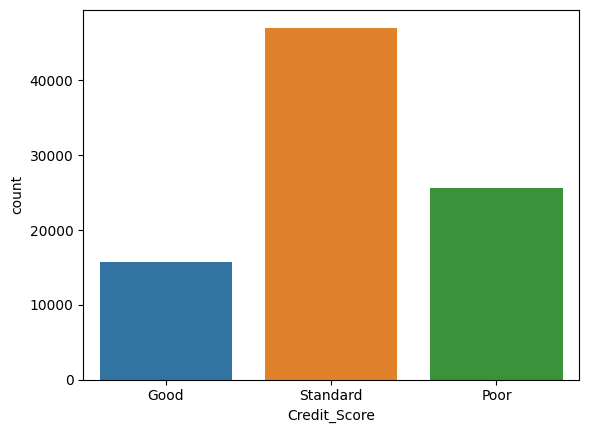

In [ ]:
sns.countplot(x='Credit_Score', data=data)
plt.show()

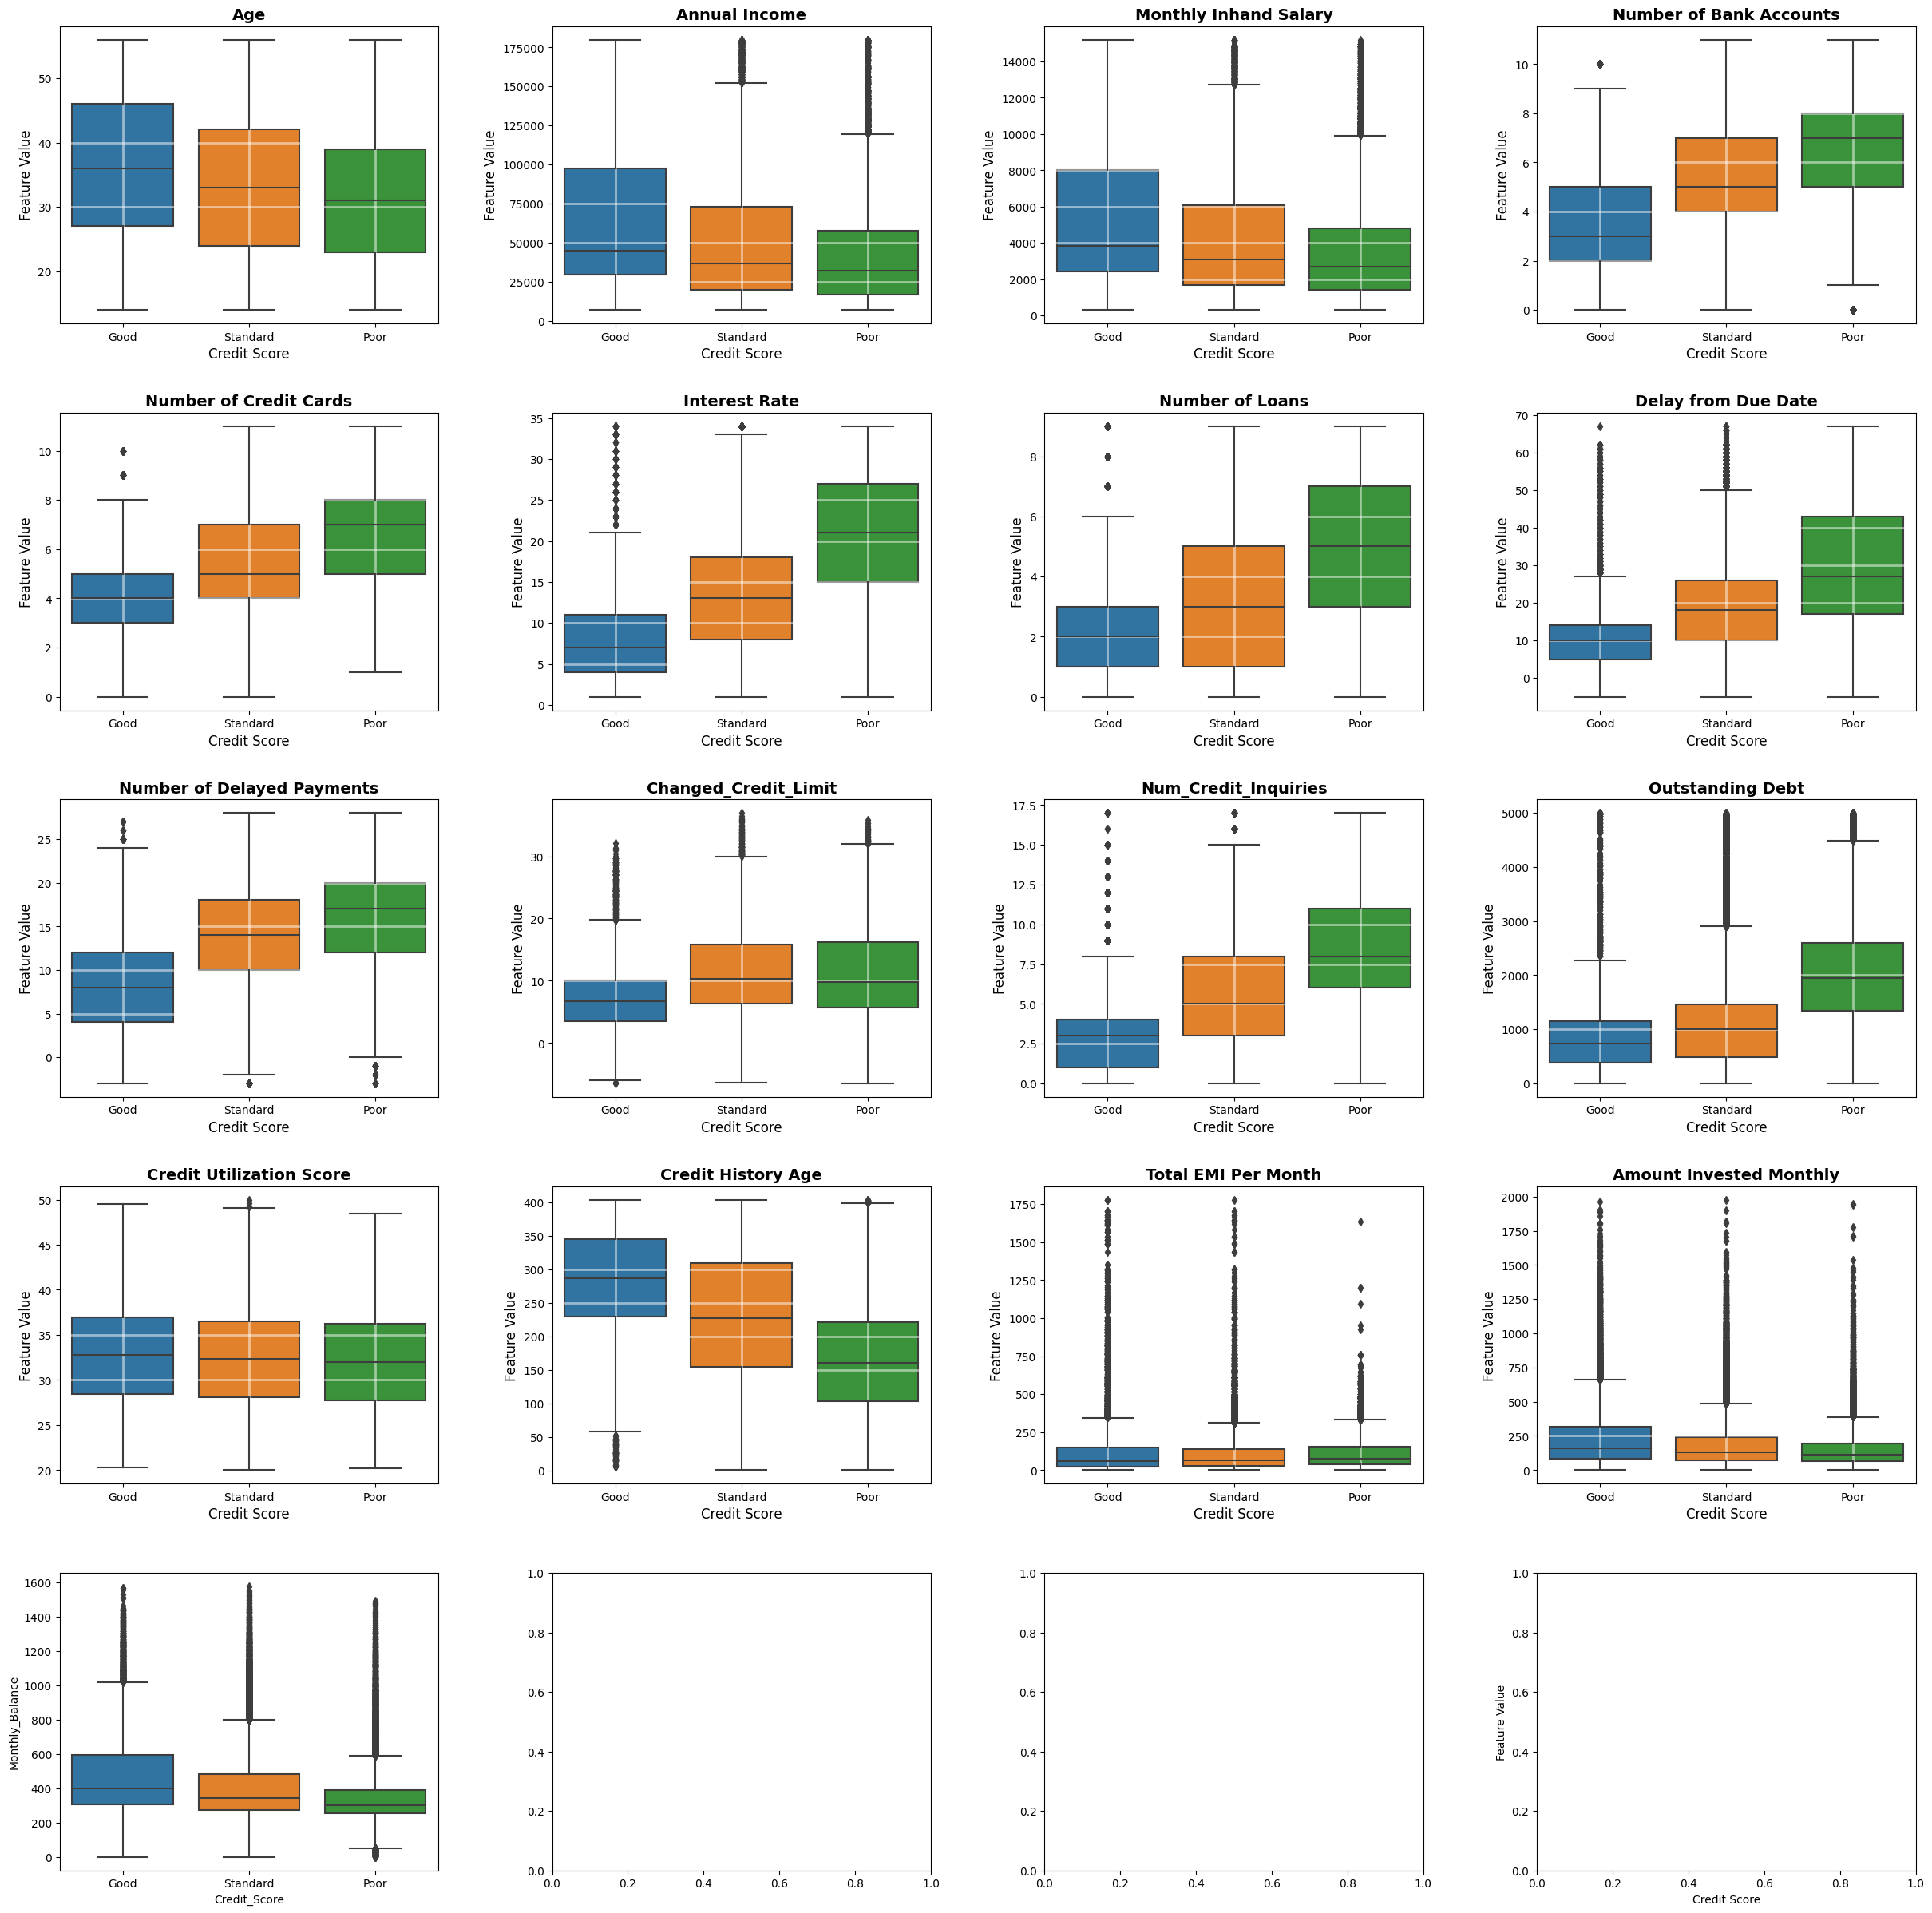

In [ ]:
fig, ax = plt.subplots(5, 4, figsize=(30, 30))
ax = ax.flatten()
sns.boxplot(x='Credit_Score', y='Age', data=data, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Annual_Income', data=data, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=data, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=data, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=data, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=data, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=data, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=data, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=data, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Changed_Credit_Limit', data=data, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Num_Credit_Inquiries', data=data, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=data, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=data, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=data, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=data, ax=ax[14])
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=data, ax=ax[15])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=data, ax=ax[16])

plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(16):
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

titles = ['Age', 'Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards', 'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Outstanding Debt', 'Credit Utilization Score', 'Credit History Age', 'Total EMI Per Month', 'Amount Invested Monthly', 'Monthly Balance']
for i in range(16):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

for i in range(16):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

plt.show()


# PRE-MODELING



In [ ]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(name)
    ax.grid(False)
    cm_display.plot(ax=ax)

In [ ]:
data = pd.get_dummies(data, columns=['Occupation','Payment_Behaviour'])
le = preprocessing.LabelEncoder()
data['Credit_Mix'] = le.fit_transform(data['Credit_Mix'])
data['Payment_of_Min_Amount'] = le.fit_transform(data['Payment_of_Min_Amount'])
data['Credit_Score'] = le.fit_transform(data['Credit_Score'])
data.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan'], axis=1, inplace=True)
data.dropna(axis=0, inplace=True)

In [ ]:
x = data.drop('Credit_Score',axis = 1)
y = data['Credit_Score']

In [ ]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2
                                                    , random_state=22)
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# *Logistic Regression*

In [ ]:
lr = LogisticRegression(max_iter=400)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("---Classification Report of Logistic Regression---")
print("accuracy score : ", accuracy_score(y_test, y_pred))
print("precision score : ", precision_score(y_test, y_pred, average='macro'))
print("recall score : ", recall_score(y_test, y_pred, average='macro'))
print("f1-score : ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

---Classification Report of Logistic Regression---
accuracy score :  0.6597572698870464
precision score :  0.6442505124702268
recall score :  0.7018234932146291
f1-score :  0.6532461746549045
              precision    recall  f1-score   support

           0       0.50      0.83      0.62      2932
           1       0.63      0.68      0.65      4818
           2       0.81      0.59      0.68      8894

    accuracy                           0.66     16644
   macro avg       0.64      0.70      0.65     16644
weighted avg       0.70      0.66      0.66     16644



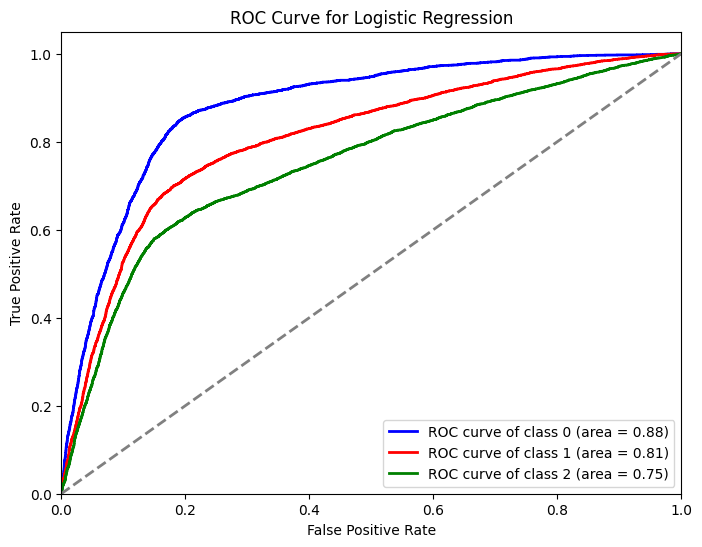

Average AUROC score: 0.8131


In [ ]:
y_pred_proba = lr.predict_proba(x_test)
nclasses = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=range(nclasses))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(nclasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print("Average AUROC score: {:.4f}".format(auc_score))

Confusion matrix of Logistic Regression
[[0.83 0.03 0.14]
 [0.14 0.68 0.18]
 [0.2  0.21 0.59]]
Training Accuracy Logistic Regression 70.10267672785974  Test Accuracy Logistic Regression 65.97572698870464


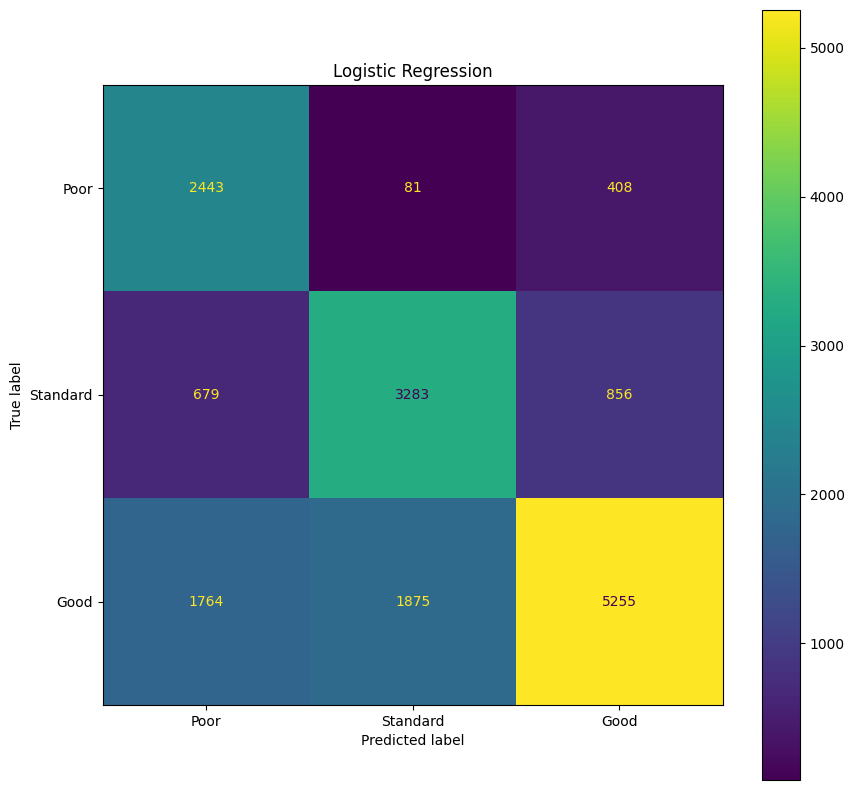

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
np.set_printoptions(precision=2)
print('Confusion matrix of Logistic Regression')
print(cm)
evaluate_classification(lr, "Logistic Regression", x_train,x_test,y_train,y_test)

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=19,
                            min_samples_split=10)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

sfm = SelectFromModel(dt, threshold=-np.inf, max_features=15)
sfm.fit(x_train, y_train)
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

dt_important = DecisionTreeClassifier(max_depth=19,
                                      min_samples_split=10)
dt_important.fit(x_important_train, y_train)
y_pred_important = dt_important.predict(x_important_test)

print("---Classification Report of Decision Tree---")
print("Accuracy score: ", accuracy_score(y_test, y_pred_important))
print("Precision score: ", precision_score(y_test, y_pred_important, average='macro'))
print("Recall score: ", recall_score(y_test, y_pred_important, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred_important, average='macro'))
print(classification_report(y_test, y_pred_important))

---Classification Report of Decision Tree---
Accuracy score:  0.7412280701754386
Precision score:  0.7159746217113928
Recall score:  0.7522710175442416
F1-score:  0.7296914575544214
              precision    recall  f1-score   support

           0       0.61      0.76      0.68      2932
           1       0.72      0.79      0.75      4818
           2       0.82      0.71      0.76      8894

    accuracy                           0.74     16644
   macro avg       0.72      0.75      0.73     16644
weighted avg       0.75      0.74      0.74     16644



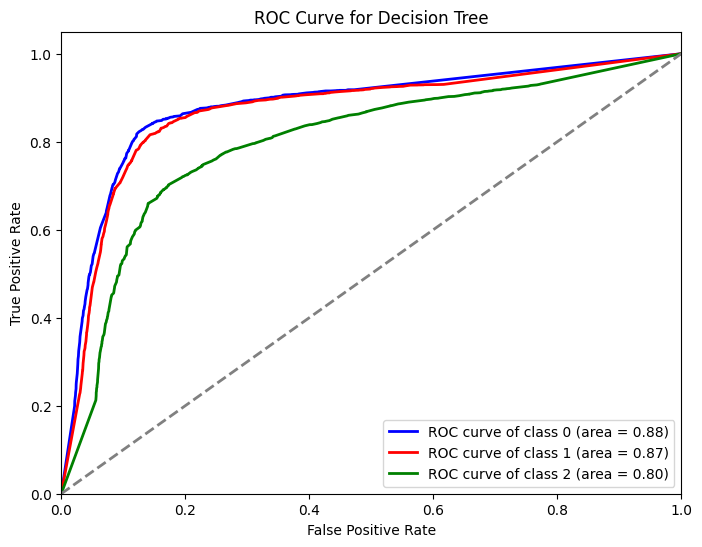

Average AUROC score: 0.8494


In [ ]:
y_pred_proba = dt_important.predict_proba(x_important_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(nclasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print("Average AUROC score: {:.4f}".format(auc_score))

Confusion matrix of Decision Tree
[[0.76 0.04 0.2 ]
 [0.04 0.79 0.17]
 [0.14 0.15 0.71]]
Training Accuracy Decision Tree 88.11896985396254  Test Accuracy Decision Tree 74.12280701754386


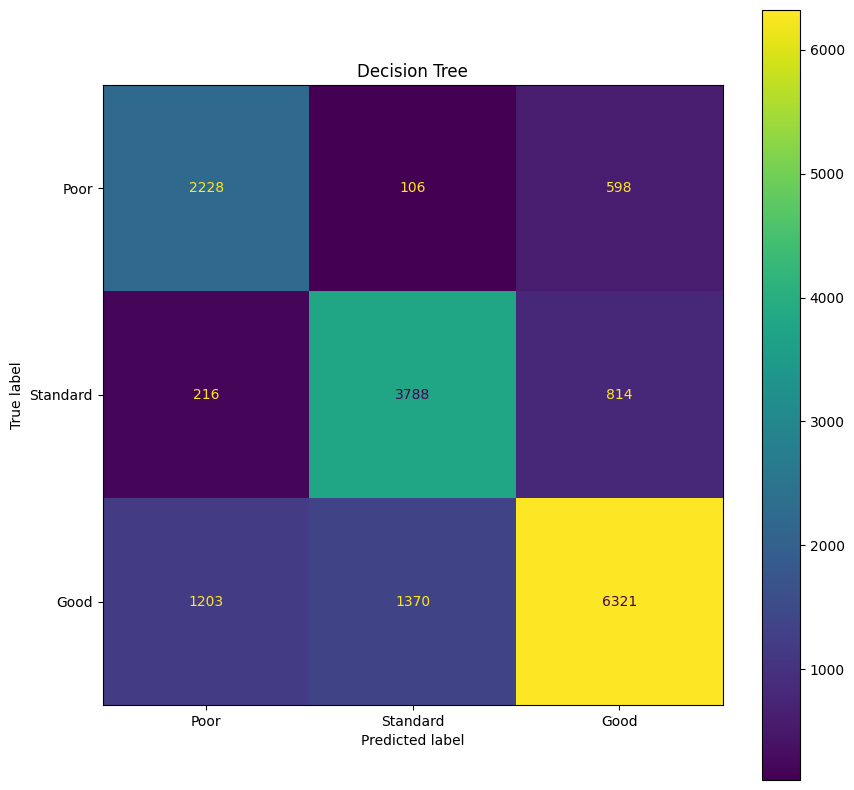

In [ ]:
cm = confusion_matrix(y_test, y_pred_important, normalize='true')
np.set_printoptions(precision=2)
print('Confusion matrix of Decision Tree')
print(cm)
evaluate_classification(dt_important, "Decision Tree", x_important_train,x_important_test,y_train,y_test)

# Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=15,
                            max_depth=70,
                            criterion='entropy', 
                            min_samples_split=4,
                            n_jobs=-1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

sfm = SelectFromModel(rf, threshold=-np.inf, max_features=15)
sfm.fit(x_train, y_train)
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

rf_important = RandomForestClassifier(n_estimators=15,
                                      max_depth=70, 
                                      criterion='entropy',
                                      min_samples_split=4, 
                                      n_jobs=-1)
rf_important.fit(x_important_train, y_train)
y_pred_important = rf_important.predict(x_important_test)

print("---Classification Report of Random Forest---")
print("Accuracy score: ", accuracy_score(y_test, y_pred_important))
print("Precision score: ", precision_score(y_test, y_pred_important, average='macro'))
print("Recall score: ", recall_score(y_test, y_pred_important, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred_important, average='macro'))
print(classification_report(y_test, y_pred_important))

---Classification Report of Random Forest---
Accuracy score:  0.8081590963710646
Precision score:  0.7907670188889134
Recall score:  0.8126758599099411
F1-score:  0.8005939016817294
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2932
           1       0.79      0.83      0.81      4818
           2       0.85      0.79      0.82      8894

    accuracy                           0.81     16644
   macro avg       0.79      0.81      0.80     16644
weighted avg       0.81      0.81      0.81     16644



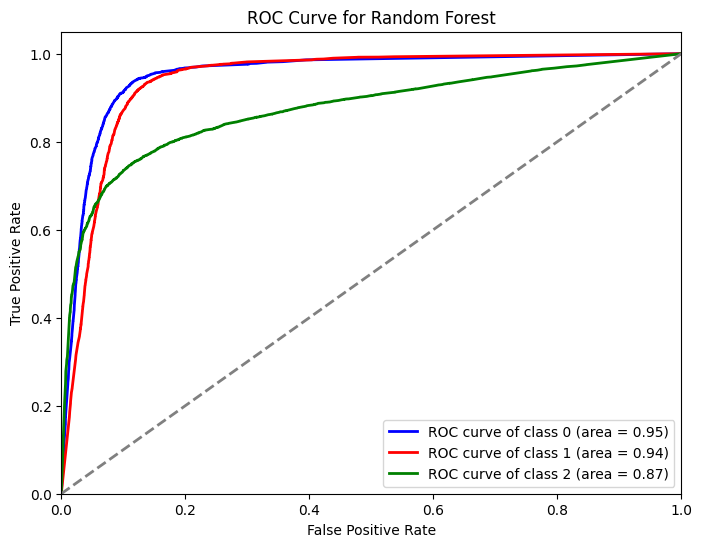

Average AUROC score: 0.9217


In [ ]:
y_pred_proba = rf_important.predict_proba(x_important_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(nclasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print("Average AUROC score: {:.4f}".format(auc_score))

Confusion matrix of Random Forest
[[0.81 0.01 0.18]
 [0.01 0.83 0.15]
 [0.09 0.12 0.79]]
Training Accuracy Random Forest 97.07268085745392  Test Accuracy Random Forest 80.82191780821918


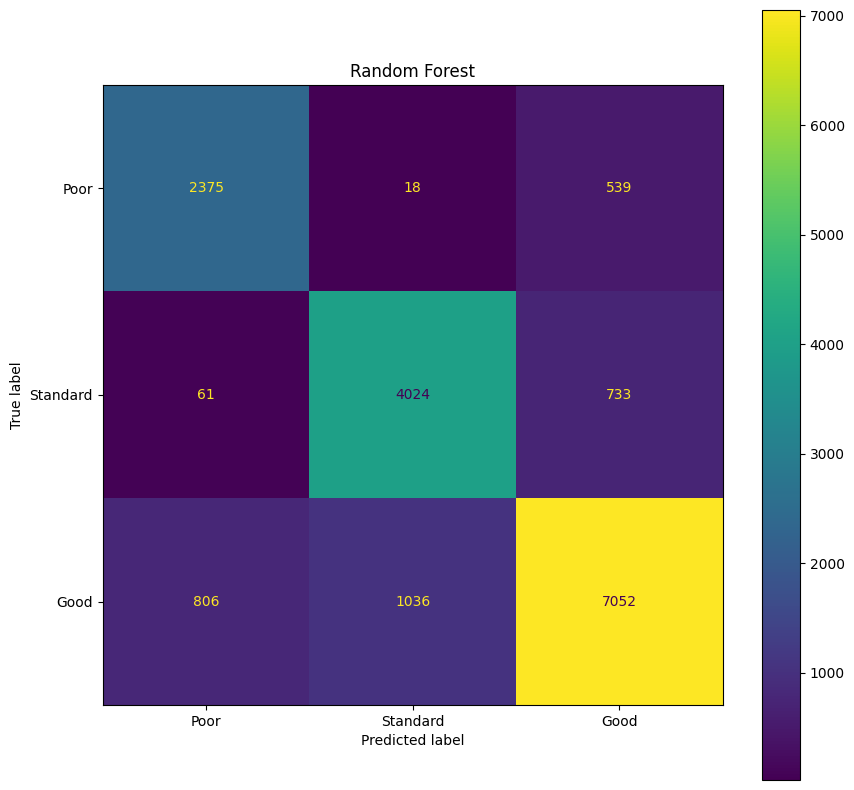

In [ ]:
cm = confusion_matrix(y_test, y_pred_important, normalize='true')
np.set_printoptions(precision=2)
print('Confusion matrix of Random Forest')
print(cm)
evaluate_classification(rf_important, "Random Forest", x_important_train,x_important_test,y_train,y_test)

# K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, 
                           weights='distance', 
                           algorithm='auto')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

selector = SelectKBest(f_classif, k=10)
selector.fit(x_train, y_train)
x_important_train = selector.transform(x_train)
x_important_test = selector.transform(x_test)

knn_important = KNeighborsClassifier(n_neighbors=7, 
                                     weights='distance', 
                                     algorithm='auto')
knn_important.fit(x_important_train, y_train)
y_pred_important = knn_important.predict(x_important_test)

print("---Classification Report of K-Nearest Neighbors---")
print("Accuracy score: ", accuracy_score(y_test, y_pred_important))
print("Precision score: ", precision_score(y_test, y_pred_important, average='macro'))
print("Recall score: ", recall_score(y_test, y_pred_important, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred_important, average='macro'))
print(classification_report(y_test, y_pred_important))

---Classification Report of K-Nearest Neighbors---
Accuracy score:  0.7667027156933429
Precision score:  0.7442336436863597
Recall score:  0.7805722365048108
F1-score:  0.758522414735551
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      2932
           1       0.76      0.81      0.78      4818
           2       0.83      0.73      0.78      8894

    accuracy                           0.77     16644
   macro avg       0.74      0.78      0.76     16644
weighted avg       0.78      0.77      0.77     16644



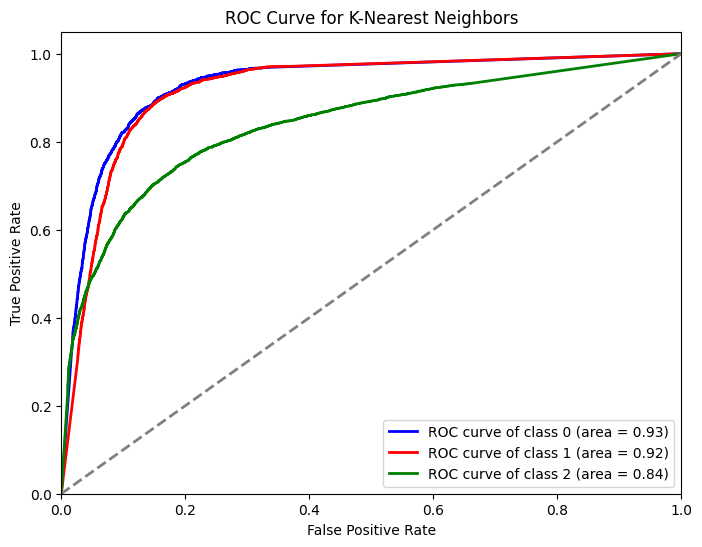

Average AUROC score: 0.8968


In [ ]:
y_pred_proba = knn_important.predict_proba(x_important_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(nclasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print("Average AUROC score: {:.4f}".format(auc_score))

Confusion matrix of K-Nearest Neighbors
[[0.8  0.01 0.19]
 [0.02 0.81 0.17]
 [0.13 0.14 0.73]]
Training Accuracy K-Nearest Neighbors 100.0  Test Accuracy K-Nearest Neighbors 76.67027156933429


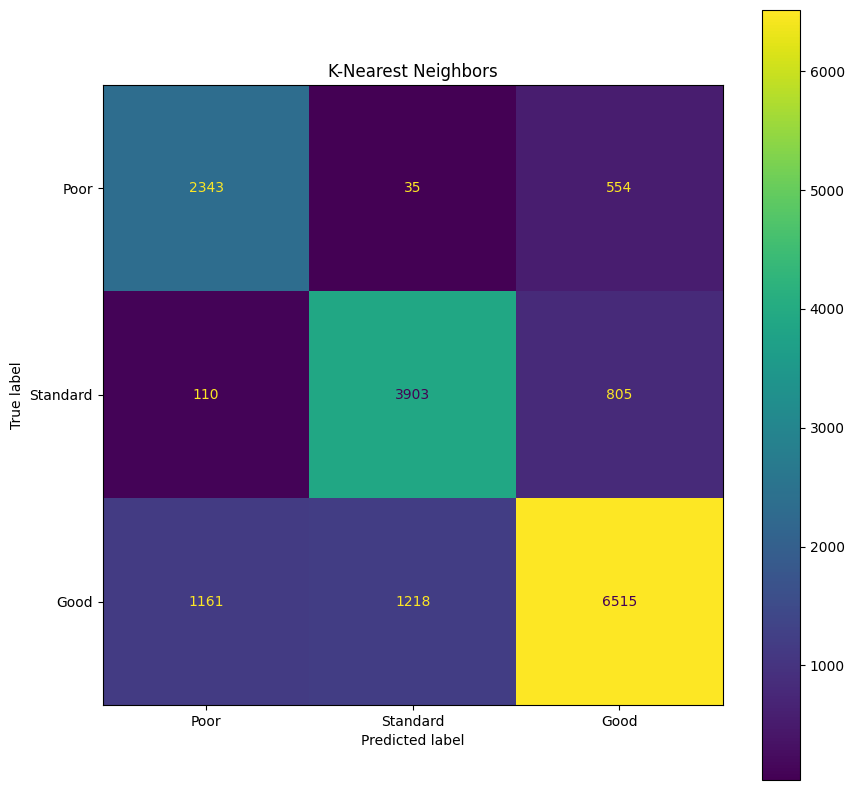

In [ ]:
cm = confusion_matrix(y_test, y_pred_important, normalize='true')
np.set_printoptions(precision=2)
print('Confusion matrix of K-Nearest Neighbors')
print(cm)
evaluate_classification(knn_important, "K-Nearest Neighbors", x_important_train,x_important_test,y_train,y_test)

# Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
param_dict = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

best_gnb = GridSearchCV(gnb, param_dict, cv=5)
best_gnb.fit(x_train, y_train)
y_pred = best_gnb.predict(x_test)

print("---Classification Report of Gaussian Naive Bayes---")
print("accuracy score : ", accuracy_score(y_test, y_pred) )
print("precision score : ", precision_score(y_test, y_pred, average='macro'))
print("recall score : ", recall_score(y_test, y_pred, average='macro') )
print("f1-score : ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

---Classification Report of Gaussian Naive Bayes---
accuracy score :  0.6120523912521029
precision score :  0.6228692680607893
recall score :  0.6843751471448988
f1-score :  0.610924356290227
              precision    recall  f1-score   support

           0       0.43      0.86      0.57      2932
           1       0.60      0.73      0.66      4818
           2       0.84      0.47      0.60      8894

    accuracy                           0.61     16644
   macro avg       0.62      0.68      0.61     16644
weighted avg       0.70      0.61      0.61     16644



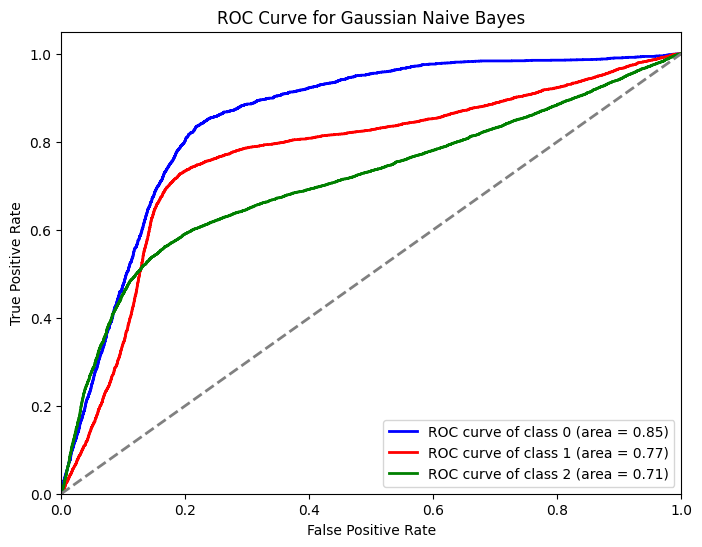

Average AUROC score: 0.7768


In [ ]:
y_pred_proba = best_gnb.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(nclasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print("Average AUROC score: {:.4f}".format(auc_score))

Confusion matrix of Gaussian Naive Bayes
[[0.86 0.03 0.12]
 [0.17 0.73 0.1 ]
 [0.28 0.25 0.47]]
Training Accuracy Gaussian Naive Bayes 68.67796673799602  Test Accuracy Gaussian Naive Bayes 61.205239125210284


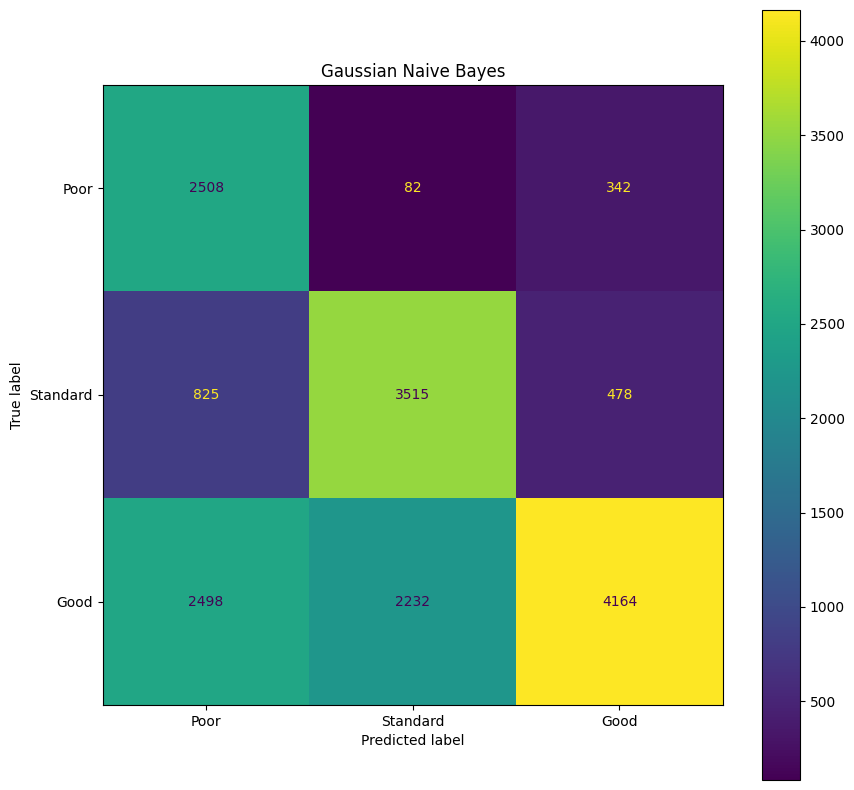

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
np.set_printoptions(precision=2)
print('Confusion matrix of Gaussian Naive Bayes')
print(cm)
evaluate_classification(best_gnb, "Gaussian Naive Bayes", x_train,x_test,y_train,y_test)

# Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=50, 
                                max_depth=3, 
                                learning_rate=0.1)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

print("---Classification Report of Gradient Boosting---")
print("accuracy score : ", accuracy_score(y_test, y_pred) )
print("precision score : ", precision_score(y_test, y_pred, average='macro'))
print("recall score : ", recall_score(y_test, y_pred, average='macro') )
print("f1-score : ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

---Classification Report of Gradient Boosting---
accuracy score :  0.6932227829848594
precision score :  0.6775893442456647
recall score :  0.7371689839531635
f1-score :  0.686314632716687
              precision    recall  f1-score   support

           0       0.51      0.85      0.64      2932
           1       0.67      0.75      0.71      4818
           2       0.85      0.61      0.71      8894

    accuracy                           0.69     16644
   macro avg       0.68      0.74      0.69     16644
weighted avg       0.74      0.69      0.70     16644



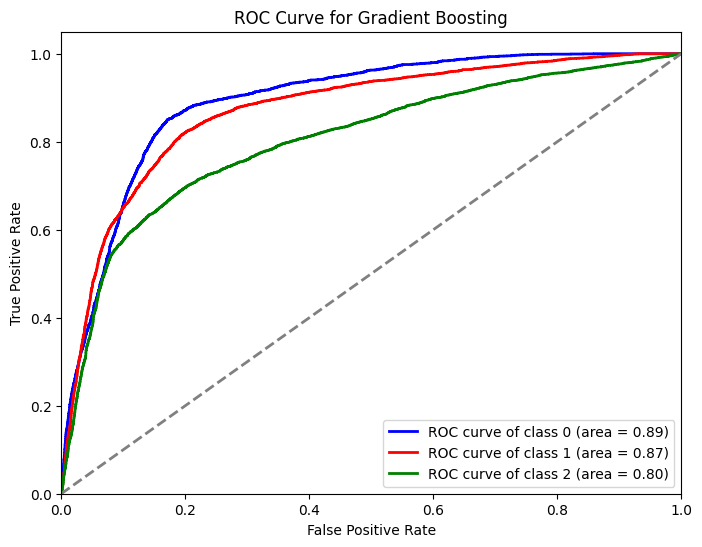

Average AUROC score: 0.8556


In [ ]:
y_pred_proba = gb.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(nclasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print("Average AUROC score: {:.4f}".format(auc_score))

Confusion matrix of Gradient Boosting
[[0.85 0.02 0.13]
 [0.13 0.75 0.12]
 [0.2  0.19 0.61]]
Training Accuracy Gradient Boosting 75.26748507714834  Test Accuracy Gradient Boosting 69.32227829848594


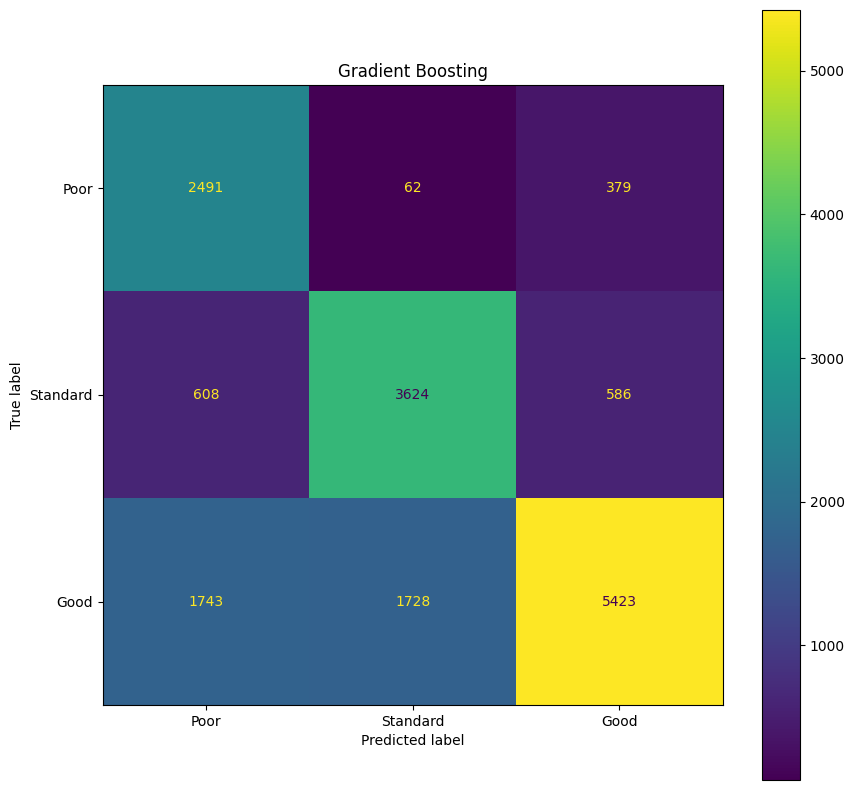

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
np.set_printoptions(precision=2)
print('Confusion matrix of Gradient Boosting')
print(cm)
evaluate_classification(gb, "Gradient Boosting", x_train,x_test,y_train,y_test)

# AdaBoost

In [ ]:
ada = AdaBoostClassifier(n_estimators=450,
                         learning_rate=0.5)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

print("---Classification Report of Adaboost---")
print("accuracy score : ", accuracy_score(y_test, y_pred))
print("precision score : ", precision_score(y_test, y_pred, average='macro'))
print("recall score : ", recall_score(y_test, y_pred, average='macro'))
print("f1-score : ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

---Classification Report of Adaboost---
accuracy score :  0.6775414563806778
precision score :  0.6567376557302024
recall score :  0.7082515475089967
f1-score :  0.6678239758409722
              precision    recall  f1-score   support

           0       0.51      0.80      0.63      2932
           1       0.65      0.70      0.67      4818
           2       0.81      0.63      0.71      8894

    accuracy                           0.68     16644
   macro avg       0.66      0.71      0.67     16644
weighted avg       0.71      0.68      0.68     16644



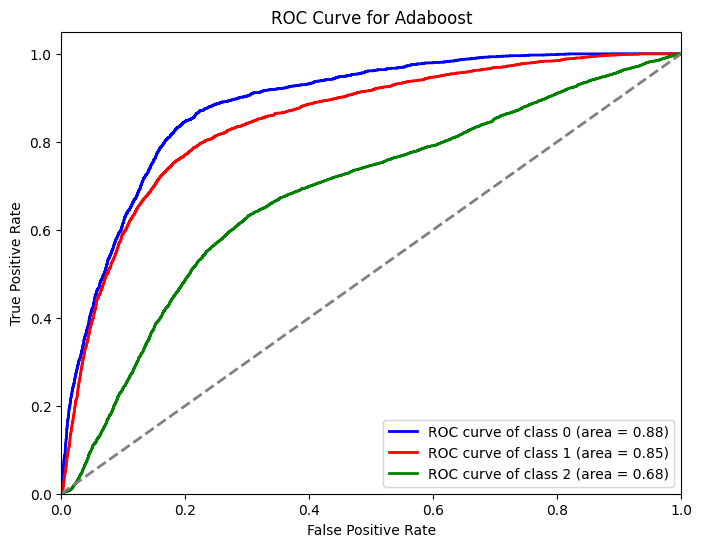

Average AUROC score: 0.8049


In [ ]:
y_pred_proba = ada.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(nclasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Adaboost')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print("Average AUROC score: {:.4f}".format(auc_score))

Confusion matrix of Adaboost
[[0.8  0.04 0.16]
 [0.13 0.7  0.17]
 [0.18 0.19 0.63]]
Training Accuracy AdaBoost 74.5410519202613  Test Accuracy AdaBoost 67.75414563806777


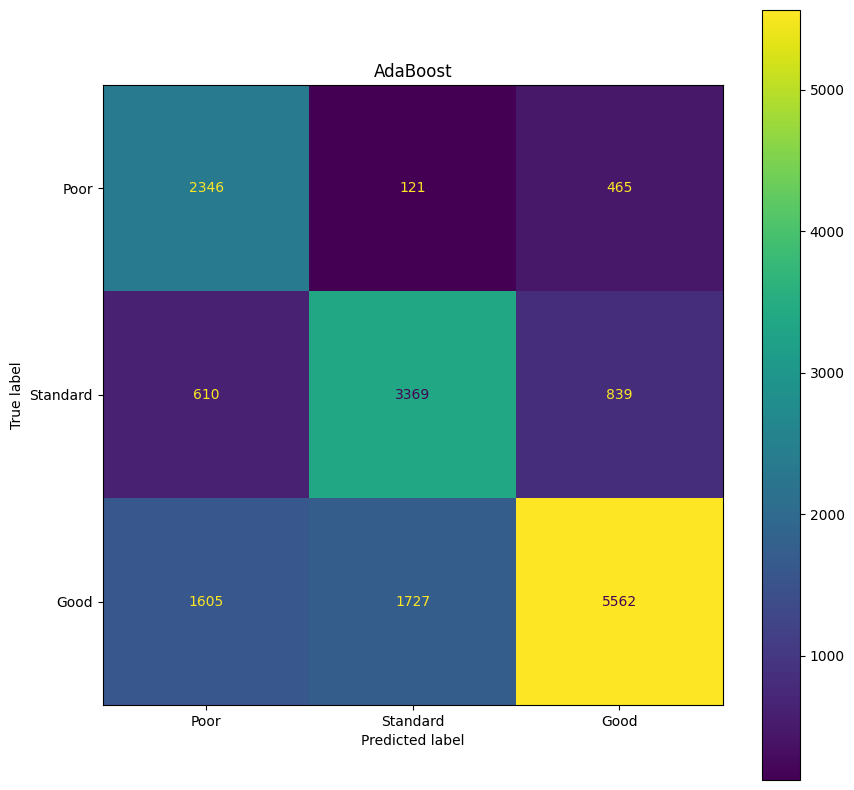

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
np.set_printoptions(precision=2)
print('Confusion matrix of Adaboost')
print(cm)
evaluate_classification(ada, "AdaBoost", x_train,x_test,y_train,y_test)